# Import Libraries

In [3]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Inference

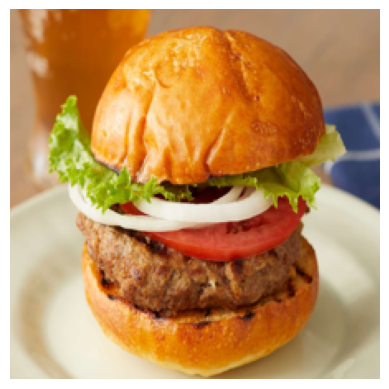

🔍 Label Prediksi: burger
✅ Nilai Confidence: 1.00


In [4]:
# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=r"kaggle\working\models\tflite\model_tf.tflite")

interpreter.allocate_tensors()

# Input/output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
img_size = (224, 224)

# Labels
labels = [
    'ayam_goreng',
    'burger',
    'donat',
    'kentang_goreng',
    'mie'
]

# speicify the image path to be predicted
image_path = r"img_for_inference\brgr.jpg"

img = Image.open(image_path).convert('RGB')
img = img.resize(img_size)
input_data = np.expand_dims(img, axis=0).astype(np.float32)
input_data /= 255.0

interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])[0]

predicted_index = np.argmax(output_data)
predicted_label = labels[predicted_index]
confidence = output_data[predicted_index]

# Tampilkan hasil prediksi + gambar
plt.imshow(img)
plt.axis('off')
plt.show()

print(f"🔍 Label Prediksi: {predicted_label}")
print(f"✅ Nilai Confidence: {confidence:.2f}")